In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

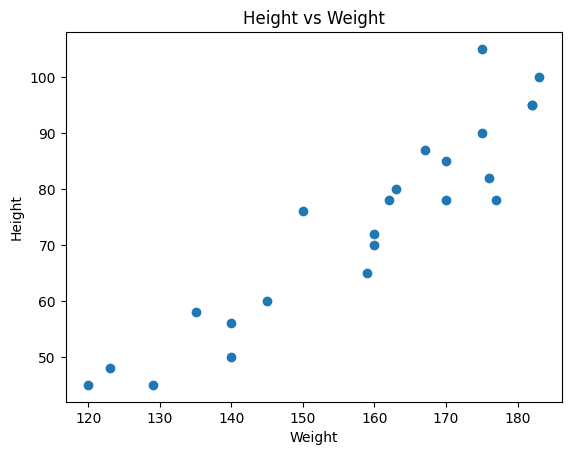

In [5]:
# scatter plot
plt.scatter(df['Height'], df['Weight'])
plt.title('Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


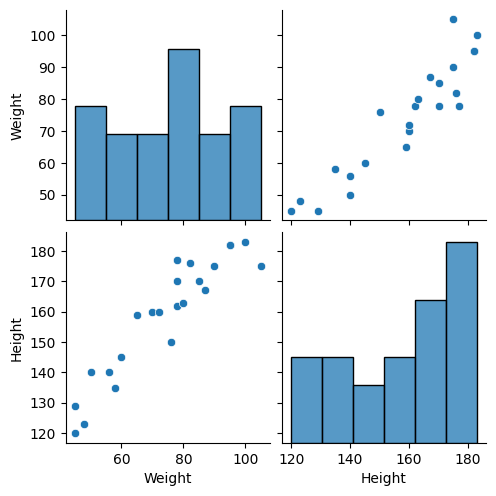

In [7]:
# Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
## Independent and Dependent Features
### Always make sure that the independent features should be in form of 2D array or in dataframe

df.head(10)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [9]:
# It should be like this
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array
#np.array(X).shape

In [10]:
# X shouldn't be like this
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [11]:
np.array(y).shape

(23,)

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


In [15]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [19]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [20]:
regression=LinearRegression(n_jobs=-1)

In [21]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


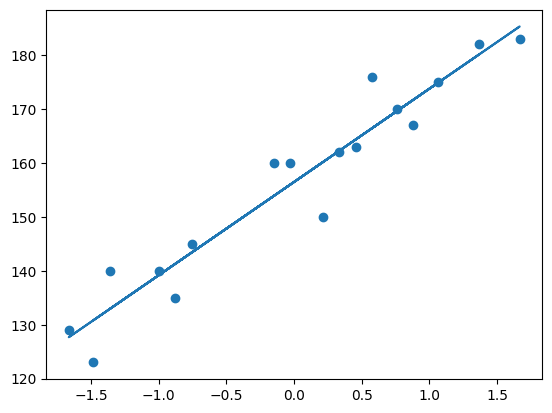

In [23]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

#### Prediction of test data
 1. predicted height output= intercept +coef_(Weights)
 2. y_pred_test =156.470 + 17.29(X_test)

In [24]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [25]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [27]:
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R Square Formula
R^2 = 1 - SSR/SST <br>
R^2 = coefficient of determination SSR = sum of squares of residuals SST = ttotal sum of squares

In [28]:
from sklearn.metrics import r2_score

In [29]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


#### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [30]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [31]:
## OLS Linear Regression
import statsmodels.api as sm

In [32]:
model=sm.OLS(y_train,X_train).fit()

In [33]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [34]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 24 Mar 2025   Prob (F-statistic):                       0.664
Time:                        13:04:36   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

array([155.97744705])